In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./Dataset/auxiliary-data/sg-shopping-malls.csv")

In [4]:
df.head()

,name,latitude,longitude
0,100 AM,1.274588,103.843471
1,313@Somerset,1.301385,103.837684
2,Aperia,1.310867,103.863930
3,Balestier Hill Shopping Centre,1.325596,103.842572
4,Bugis Cube,1.298141,103.855635


In [5]:
def haversine_distance(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    distance = 6371000 * c
    return distance

In [6]:
school_df = df.copy()
longi = 100
lati = 1
min(school_df.apply(lambda x: haversine_distance(x['longitude'], x['latitude'], longi, lati), axis=1))

412780.48807889415

In [7]:
def calc_dist(school_df, longi, lati):
    return school_df.apply(lambda x: haversine_distance(x['longitude'], x['latitude'], longi, lati), axis=1)

In [8]:
def find_nearest_school(longi, lati, school_df):
    dist = calc_dist(school_df, longi, lati)
    return min(dist)

def find_area_school(longi, lati, radius, school_df):
    """
    @param radius: meter
    """
    dist = calc_dist(school_df=school_df, lati=lati, longi=longi)
    return sum(dist < radius)
    

In [9]:
dist = calc_dist(school_df, lati=lati, longi=longi)

In [21]:
data_df = pd.read_csv("./Dataset/test.csv")
data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region


In [11]:
data_df.loc[:100, :].apply(lambda x: find_nearest_school(x['longitude'], x['latitude'], school_df), axis=1)

0     1202.673513
1     1114.338361
2      468.296504
3      402.358778
4     1073.353709
5      355.099430
6      295.652538
7     1088.946725
8     1032.633071
9      315.474728
10     463.398250
dtype: float64

In [22]:
nearest_school_dist = data_df.apply(lambda x: find_nearest_school(x['longitude'], x['latitude'], school_df), axis=1)

In [17]:
sum(data_df.loc[:100, :].apply(lambda x: find_area_school(x['longitude'], x['latitude'], 500, school_df), axis=1))

47

In [23]:
r500_school_dist = data_df.apply(lambda x: find_area_school(x['longitude'], x['latitude'], 500, school_df), axis=1)

In [57]:
r500_school_dist.values

array([1, 0, 1, ..., 1, 1, 0])

In [24]:
pd.DataFrame({
    "index": data_df.reset_index()['index'],
    "num_shopping_mall_500m": r500_school_dist,
    "nearest_shopping_mall_dist": round(nearest_school_dist, 2)
}).to_csv("./preprocessed/test_7.csv", index=False)

In [142]:
import matplotlib.pyplot as plt

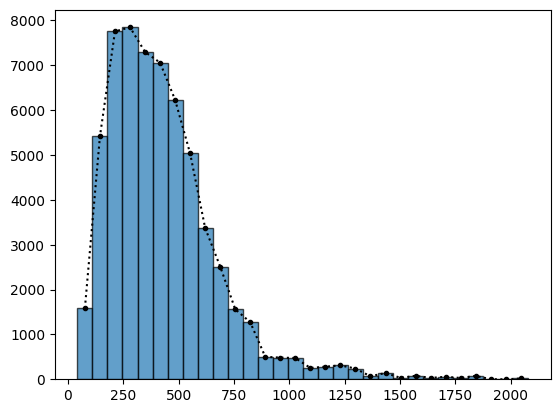

In [141]:
# 使用plt.hist获取直方图数据，但不实际绘制直方图

hist_data, bin_edges, _ = plt.hist(nearest_school_dist, 30, edgecolor='k', alpha=0.7)
# plt.clf()

# 使用中点绘制频率多边形
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_centers, hist_data, 'k', marker='.', linestyle='dotted')
# plt.grid()
plt.show()

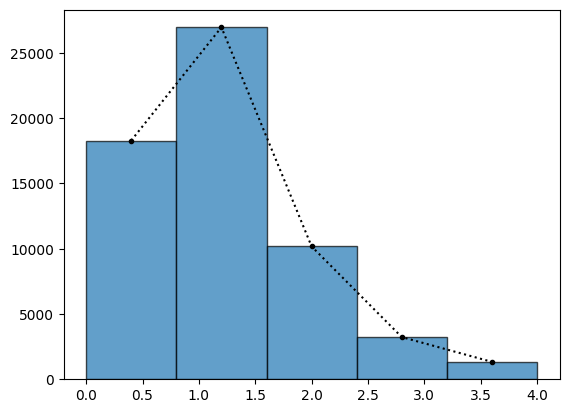

In [145]:
# 使用plt.hist获取直方图数据，但不实际绘制直方图

hist_data, bin_edges, _ = plt.hist(r500_school_dist, 5, edgecolor='k', alpha=0.7)
# plt.clf()

# 使用中点绘制频率多边形
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_centers, hist_data, 'k', marker='.', linestyle='dotted')
# plt.grid()
plt.show()